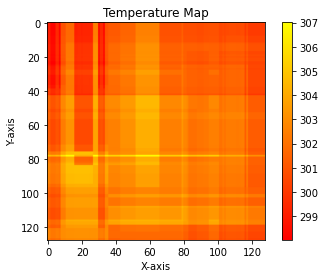

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import seaborn as sns

df = pd.read_csv("data_28-10.csv")
corrmat = df.corr()
top_corr_features=corrmat.index
features = ['Sensor 1 Temp', 'Sensor 2 Temp', 'Timestep', 'X', 'Y', 'Z']
y = df['Temp']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
x = df[features]
x_train, x_test, y_train, y_test = train_test_split(x,y)

from xgboost import XGBRegressor
xgmodel = XGBRegressor()
xgmodel.fit(x_train,y_train)
pred = xgmodel.predict(x_test)
random_data = pd.read_csv('_test.csv')
temp_pred = xgmodel.predict(random_data)
random_data['Temp'] = temp_pred
random_data.to_csv('random_pred.csv')

import matplotlib.pyplot as plt
x1 = random_data['Y']
x2 = random_data['Z']
f = random_data['Temp']
f = np.array(f,dtype=float)
f=f.reshape(128,128)

cmap = plt.get_cmap('autumn')
fig, ax = plt.subplots()
im = ax.imshow(f, cmap=cmap)
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Temperature Map')
plt.show()

In [1]:
pip install xgboost

     --------------------------------------- 70.9/70.9 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
